# Chapter 4 : Classficiation

## Importing Python Modules

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importing Dataset

In [162]:
df = pd.read_csv("C:/Users/Gordon Li/Desktop\ISLR2/files/Smarket.csv")

First let  us have a look at the head of the dataframe. 

In [163]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Now looking at our dataframe info gives us: 

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


There is nothing particularly peculiar in each of our columns. 

Let's have a look a the dimensions of our dataset: 

In [165]:
df.shape

(1250, 9)

Our dataset has 1 target variable and 8 features. Our dataframe has 1250 observations.

Finally let us describe the numeric features of our dataset. 

In [166]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [167]:
df["Direction"].describe()

count     1250
unique       2
top         Up
freq       648
Name: Direction, dtype: object

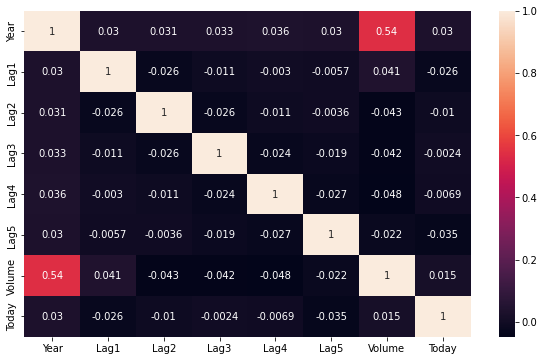

In [168]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

The correlations between the lag variables and today's returns are close to zero.  In other words, there appears to be little correlation between today's returns and previous day's returns. The only substantial correlation is between `Year` and `Volume`. By plotting the data, which is orderered chronologically, we see that `Volume` is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.





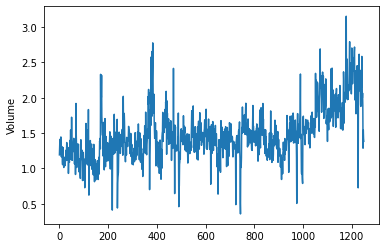

In [169]:
sns.lineplot(data = df["Volume"])
plt.show()

## One Hot Encoding

In [170]:
df = pd.get_dummies(data = df, prefix = ["Direction"]).drop('Direction_Down', axis = 1).rename({'Direction_Up' : 'Direction'}, axis = 1)

In [171]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


## Logistic Regression

### Using StatsModels

#### Model Fitting our Dataset

In [189]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [190]:
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'

In [191]:
log_reg = smf.glm(formula = formula, data = df, family = sm.families.Binomial())
model = log_reg.fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Sun, 21 Aug 2022   Deviance:                       1727.6
Time:                        19:19:41   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002868
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.6

The smallest *p*-value here is associated with Lag1. The negative coefficient for this predictor suggests that if the market had a positive return yesterday then it is less likely to go up today. However, at a value of 0.15, the *p*-value is still relatviely large and so there is no clear evidence of a real association between `Lag1` and `Direction`. 

In [192]:
# Accesses the coefficients of our model
model.params

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [193]:
# Accesses the p-values of our model
model.pvalues

Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

In [194]:
y_probs = model.predict()
y_probs[0:9]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353])

In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, `up` or `down`. 

In [199]:
y_pred = [1 if x > 0.5 else 0 for x in y_probs]

In [200]:
y_true = df["Direction"]

#### Analysing Our data

##### Confusion Matrix

In [242]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[145, 457],
       [141, 507]], dtype=int64)

##### Predicting Accuracy

Three methods in predicting accuracy: 
1. Predicting by hand
2. Doing it on sklearn.metrics or
3. By np.mean

In [214]:
from sklearn.metrics import accuracy_score

In [229]:
# Method 1
accuracy_1 = (145 + 507) / 1250
print("Method 1:", accuracy_1)
# Method 2 
accuracy_2 = accuracy_score(y_true, y_pred)
print("Method 2:", accuracy_2)
# Method 3
accuracy_3 = np.mean(y_pred == y_true)
print("Method 3:", accuracy_3)


Method 1: 0.5216
Method 2: 0.5216
Method 3: 0.5216


The diagonal elements of the confusion matrix include correct predictions, while the off-daigonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of $507 + 145 =652$ correct predictions. Logistic regression as shown above correctly predicted the movement of the market $52.2\%$ of the time. 

At a first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the model on the same set of 1250 observations. 

In [233]:
training_error = 1 - accuracy_1
print(round(training_error, 3))

0.478


#### Model using train and test

The training error is often overly optimistic - it tends to underestimate the test error rate. In order to better assess the accuracy of the logsitic regression model in this setting, we can fit the model using part of the data and then examine how well it predicts the held out data. This will yield a more realistic error rate, in the sense that in practice we will be interested in our model's perfromance not on the data that we used to fit the model, but rather on days in the future for which the market's movements are unknown.

To implement this strategy, we assign the observations from 2001 to 2004 to be training set and 2005 to be our test set.

In [240]:
train = df[df['Year'] < 2005]
test = df[df['Year'] == 2005]

In [241]:
print("Train:", train.shape)
print("Test:", test.shape)

Train: (998, 9)
Test: (252, 9)


In [243]:
log_reg = smf.glm(formula = formula, data = train, family = sm.families.Binomial())
model = log_reg.fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  998
Model:                            GLM   Df Residuals:                      991
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -690.55
Date:                Sun, 21 Aug 2022   Deviance:                       1381.1
Time:                        22:41:24   Pearson chi2:                     998.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002162
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.5

In [244]:
y_probs = model.predict(test)
y_probs[0:9]

998     0.528220
999     0.515669
1000    0.522652
1001    0.513854
1002    0.498334
1003    0.501091
1004    0.502770
1005    0.509568
1006    0.504011
dtype: float64

In [247]:
y_pred = [1 if x > 0.5 else 0 for x in y_probs]
y_true = test['Direction']

##### Confusion Matrix

In [248]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[77, 34],
       [97, 44]], dtype=int64)

##### Accuracy Score

In [251]:
print("Accuracy score:", accuracy_score(y_true, y_pred))
print("Error test rate:", 1 - accuracy_score(y_true, y_pred))

Accuracy score: 0.4801587301587302
Error test rate: 0.5198412698412698
